In [126]:
# import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load dataset
with open('./infect-dublin.csv') as f: 
    lines = f.readlines();

# lines are edges in our graph
lines = [line.strip().split() for line in lines]
# lines

## plot Infect-dublin and random models

our modles are WS, BA, ER and Holme-Kim(HK)

410

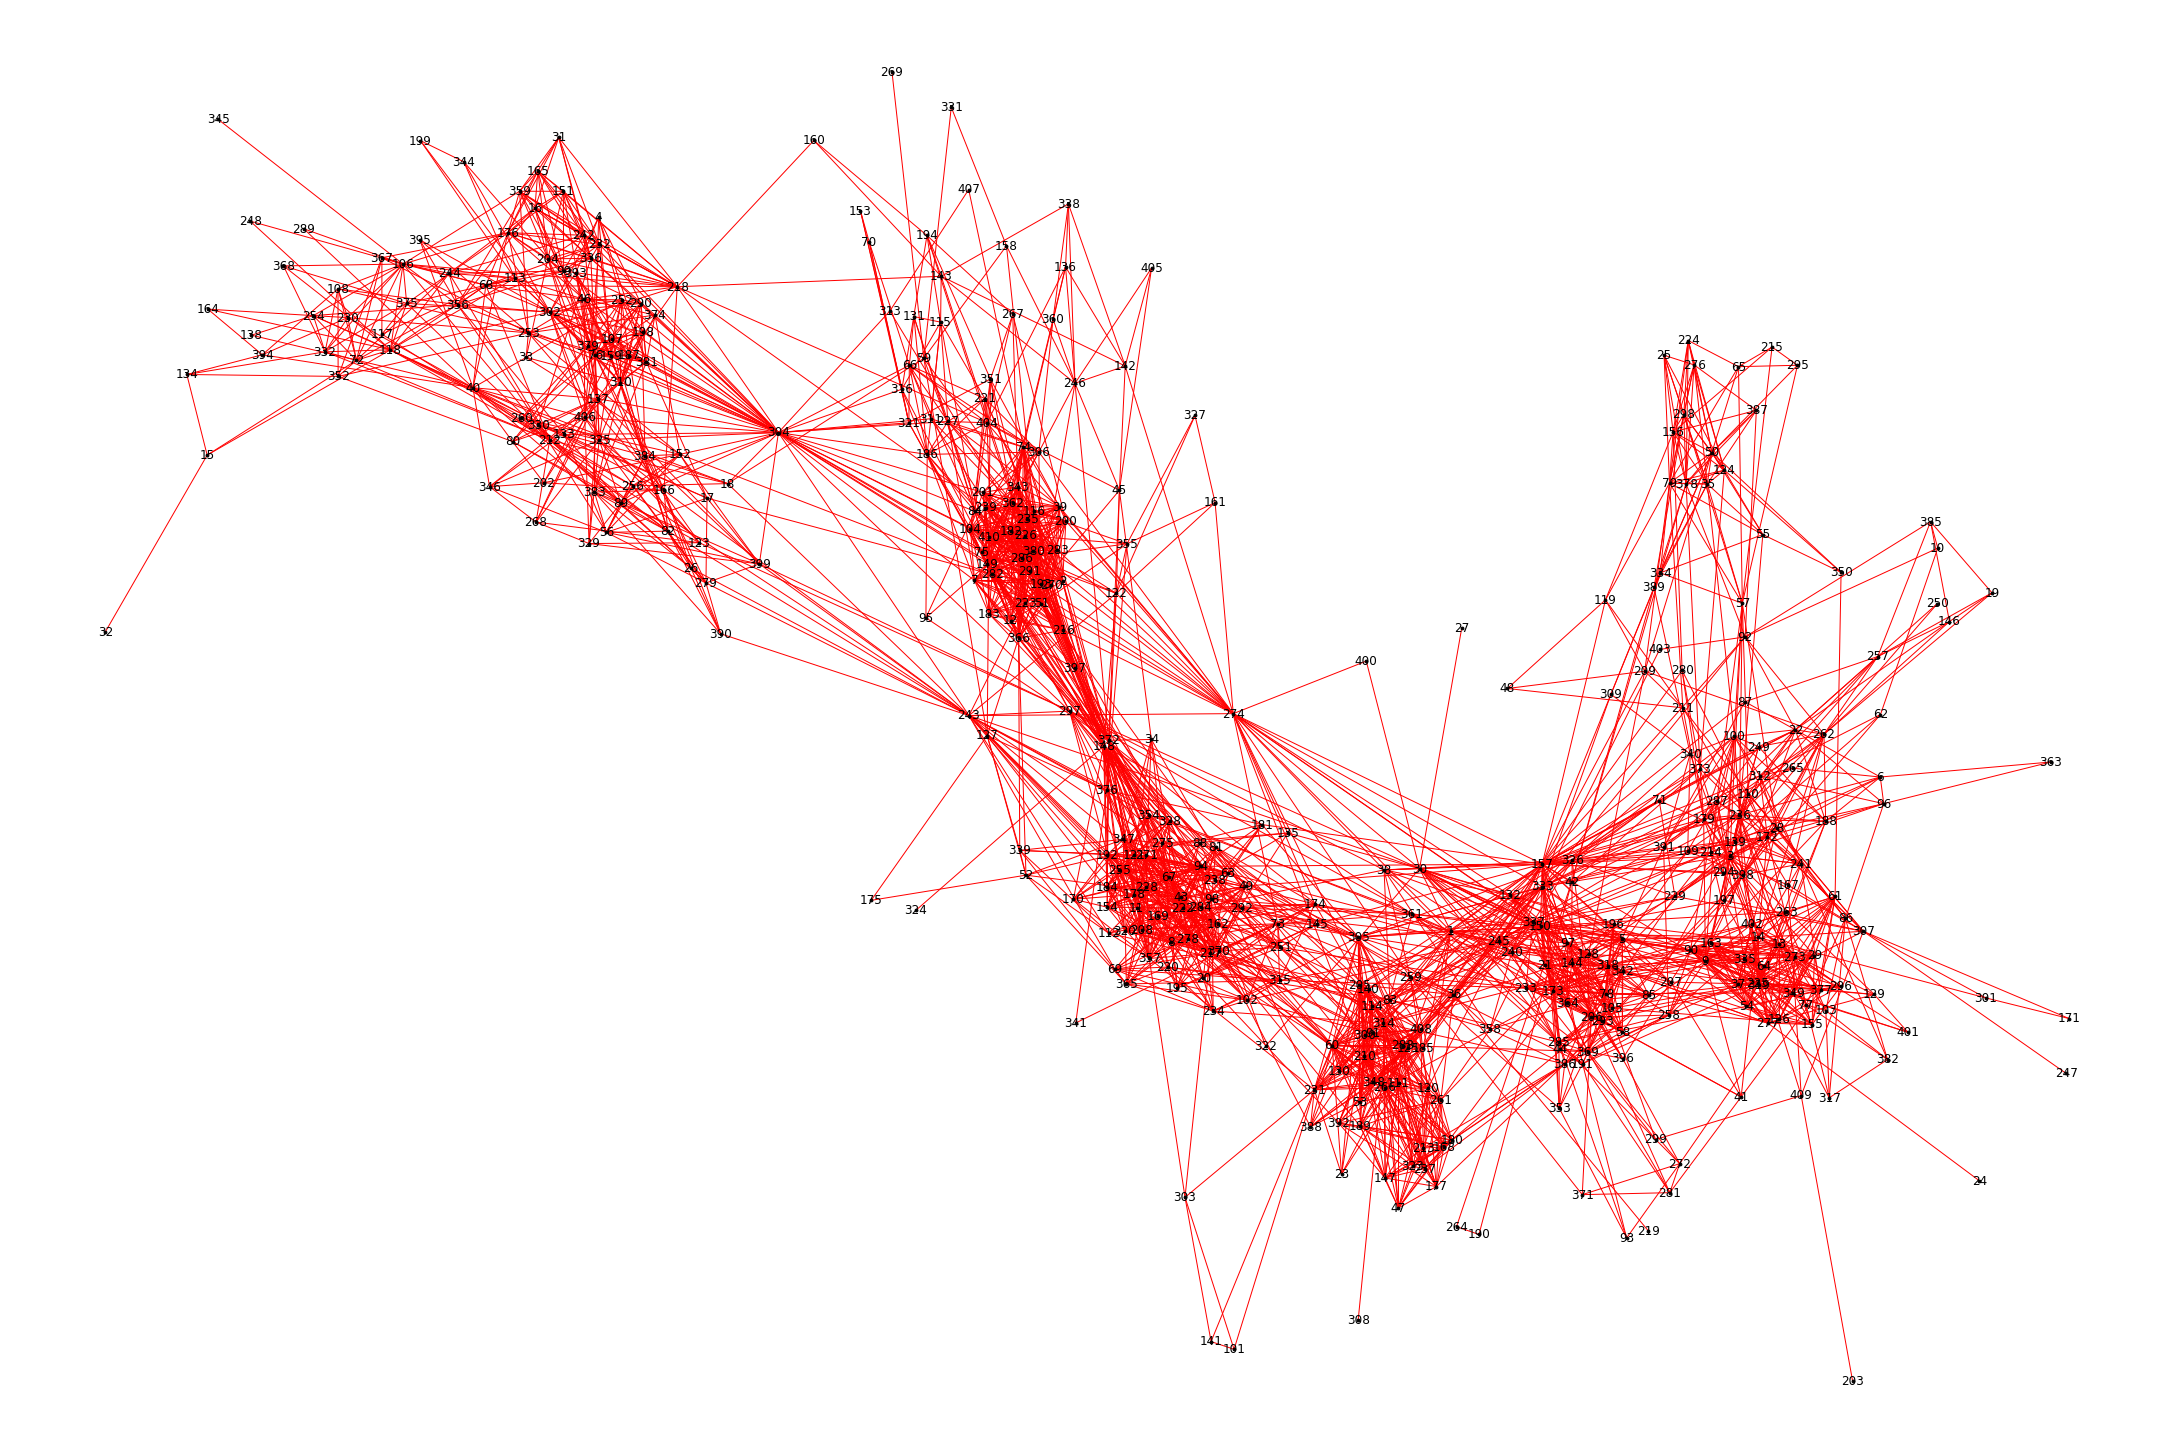

In [127]:
# plot main graph
plt.figure(figsize=(30,20))

# create graph
G = nx.Graph()
G.add_edges_from(lines)

nx.draw_spring(G,
               with_labels=True,
               arrows=False,
               alpha=1,
               edge_color='r',
               node_label_size=1,
               node_color='black',
               node_size=8)
nx.number_of_nodes(G)

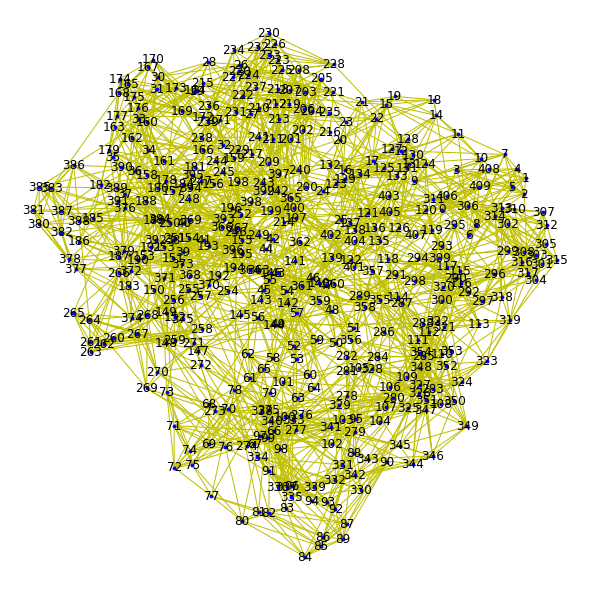

In [175]:
# create WS model
watss_model = nx.watts_strogatz_graph(n=410, k=11, p=0.12)
pos = nx.circular_layout(watss_model)
plt.figure(figsize = (8, 8))
nx.draw_spring(watss_model,
           with_labels=True,
           alpha=1,
           edge_color='y',
           node_label_size=3,
           node_color='b',
           node_size=8)


3216


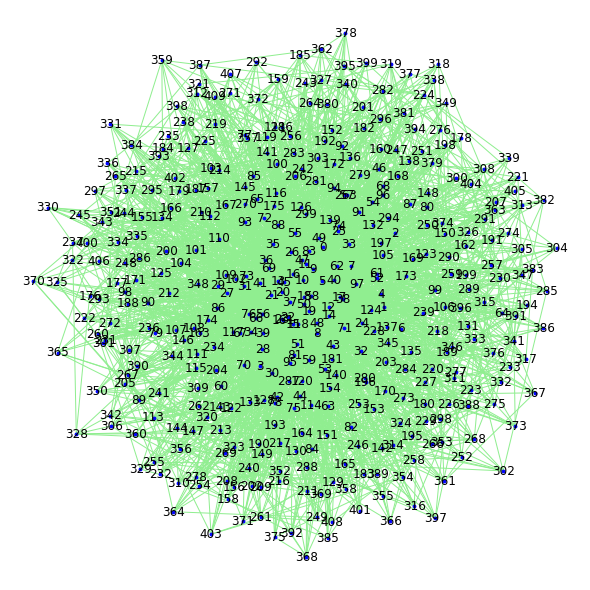

In [129]:
# barabasi model
barabasi_model = nx.barabasi_albert_graph(n=410, m=8, seed=None)

plt.figure(figsize = (8, 8))
nx.draw_spring(barabasi_model,
           with_labels=True,
           alpha=1,
           edge_color='lightgreen',
           node_label_size=3,
           node_color='b',
           node_size=8)
print(len(barabasi_model.edges()))


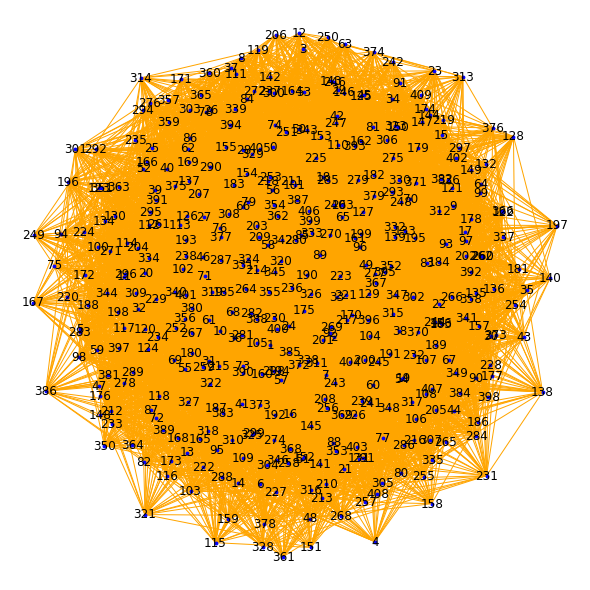

In [130]:
# erdos-reyni model

erdos_model = nx.erdos_renyi_graph(n=410, p=0.1)

plt.figure(figsize = (8, 8))
#     pos = nx.circular_layout(erdos_model)
nx.draw_spring(erdos_model,
           with_labels=True,
           alpha=1,
           edge_color='orange',
           node_label_size=3,
           node_color='b',
           node_size=8)


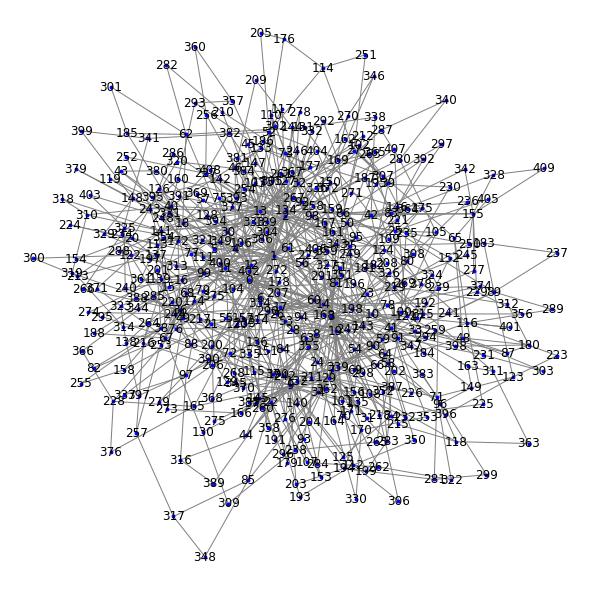

In [131]:
# Holme and kim Model
holme_model = nx.powerlaw_cluster_graph(n=410,m=2, p=0.2)
# pos = nx.circular_layout(holme_model)
plt.figure(figsize = (8, 8))
nx.draw_spring(holme_model,
           with_labels=True,
           alpha=1,
           edge_color='gray',
           node_label_size=3,
           node_color='b',
           node_size=8)

# now lets compute macro-level metrics :))

average clustering coefficient

In [176]:
#compare average clustering
averageClusteringInfectDublin = nx.average_clustering(G)
averageClusteringErods = nx.average_clustering(erdos_model)
averageClusteringWatss = nx.average_clustering(watss_model)
averageClusteringBarabasi = nx.average_clustering(barabasi_model)
averageClusteringHolme = nx.average_clustering(holme_model)

print('average clustering infectdublin: ', round(averageClusteringInfectDublin, 4))
print('average clustering erdos: ', round(averageClusteringErods, 4))
print('average clustering watss: ', round(averageClusteringWatss, 4))
print('average clustering barabasi: ', round(averageClusteringBarabasi, 4))
print('average clustering holme: ', round(averageClusteringHolme, 4))

average clustering infectdublin:  0.4558
average clustering erdos:  0.0986
average clustering watss:  0.456
average clustering barabasi:  0.0994
average clustering holme:  0.192


degree distribution:

In [177]:
#compare degree distributions
import collections

def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt)

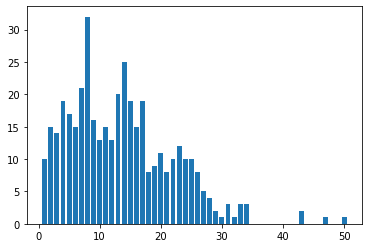

In [134]:
# for infect dublin network
plot_degree_distribution(G)

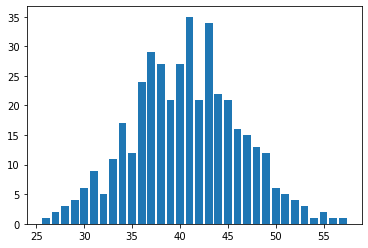

In [135]:
# for erdos-renyi network
plot_degree_distribution(erdos_model)

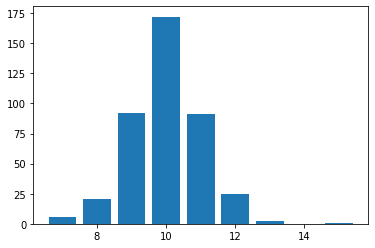

In [178]:
# for wats-strogatz model
plot_degree_distribution(watss_model)

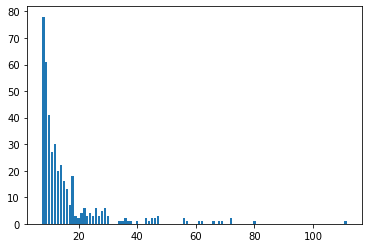

In [137]:
# for barabasi-albert model
plot_degree_distribution(barabasi_model)

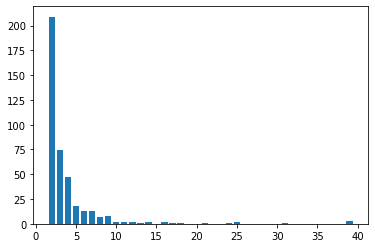

In [138]:
# for holme-kim model
plot_degree_distribution(holme_model)

diameter:

In [179]:
# compare diameters
infectDublinDiameter = nx.diameter(G)
erdosDiameter = nx.diameter(erdos_model)
wattsDublinDiameter = nx.diameter(watss_model)
barabasiDublinDiameter = nx.diameter(barabasi_model)
holmeDiameter = nx.diameter(holme_model)

print('infectDublin diameter: ', round(infectDublinDiameter, 4))
print('erdos diameter: ', round(erdosDiameter, 4))
print('watts diameter: ', round(wattsDublinDiameter, 4))
print('barabasi diameter: ', round(barabasiDublinDiameter, 4))
print('holme diameter: ', round(holmeDiameter, 4))

infectDublin diameter:  9
erdos diameter:  3
watts diameter:  6
barabasi diameter:  4
holme diameter:  7


density:

In [184]:
# compare densities
infectDublinDensity = nx.density(G)
erdosDensity = nx.density(erdos_model)
wattsDensity = nx.density(watss_model)
barabasiDensity = nx.density(barabasi_model)
holmeDensity = nx.density(holme_model)

print('infectDublin density: ', round(infectDublinDensity, 4))
print('erdos density: ', round(erdosDensity, 4))
print('watts density: ', round(wattsDensity, 4))
print('barabasi density: ', round(barabasiDensity, 4))
print('holme density: ', round(holmeDensity, 4))

infectDublin density:  0.033
erdos density:  0.0994
watts density:  0.0244
barabasi density:  0.0384
holme density:  0.0097


average shortest path lentgh:

In [185]:
# compare average shortest path length
infectDublinShortetstPathLength = nx.average_shortest_path_length(G)
erdosShortetstPathLength = nx.average_shortest_path_length(erdos_model)
wattsShortetstPathLength = nx.average_shortest_path_length(watss_model)
barabasiShortetstPathLength = nx.average_shortest_path_length(barabasi_model)
holmeShortetstPathLength = nx.average_shortest_path_length(holme_model)

print('infectDublin average shortest path length: ', round(infectDublinShortetstPathLength, 4))
print('erdos average shortest path length: ', round(erdosShortetstPathLength, 4))
print('watts average shortest path length: ', round(wattsShortetstPathLength, 4))
print('barabasi average shortest path length: ', round(barabasiShortetstPathLength, 4))
print('holme average shortest path length: ', round(holmeShortetstPathLength, 4))

infectDublin average shortest path length:  3.6309
erdos average shortest path length:  1.9153
watts average shortest path length:  3.6052
barabasi average shortest path length:  2.4257
holme average shortest path length:  3.762


assortativity coefficient:

In [186]:
# compare assortativity coefficient
infectDublinAssortativity = nx.degree_assortativity_coefficient(G)
erdosAssortativity = nx.degree_assortativity_coefficient(erdos_model)
wattsAssortativity = nx.degree_assortativity_coefficient(watss_model)
barabasiAssortativity = nx.degree_assortativity_coefficient(barabasi_model)
holmeAssortativity = nx.degree_assortativity_coefficient(holme_model)

print('infectDublin assortativity coefficient: ', round(infectDublinAssortativity, 4))
print('erdos assortativity coefficient: ', round(erdosAssortativity, 4))
print('watts assortativity coefficient: ', round(wattsAssortativity, 4))
print('barabasi assortativity coefficient: ', round(barabasiAssortativity, 4))
print('holme assortativity coefficient: ', round(holmeAssortativity, 4))

infectDublin assortativity coefficient:  0.2258
erdos assortativity coefficient:  0.0212
watts assortativity coefficient:  -0.0053
barabasi assortativity coefficient:  -0.0413
holme assortativity coefficient:  -0.141


Transitivity:

In [187]:
# compare transitivities
infectDublinTransitivity = nx.transitivity(G)
erodsTransitivity = nx.transitivity(erdos_model)
wattsTransitivity = nx.transitivity(watss_model)
barabasiTransitivity = nx.transitivity(barabasi_model)
holmeTransitivity = nx.transitivity(holme_model)

print('infectDublin transitivity: ', round(infectDublinTransitivity, 4))
print('erdos transitivity: ', round(erodsTransitivity, 4))
print('watts transitivity: ', round(wattsTransitivity, 4))
print('barabasi transitivity: ', round(barabasiTransitivity, 4))
print('holme transitivity: ', round(holmeTransitivity, 4))

infectDublin transitivity:  0.4357
erdos transitivity:  0.0987
watts transitivity:  0.4488
barabasi transitivity:  0.0879
holme transitivity:  0.0516
